In [1]:
import pandas as pd

In [2]:
dataset = pd.read_csv('./dataset.csv')
dataset.tail()

,house_type,house_size,city,latitude,longitude,price,currency,numBathrooms,numBalconies,Status
4995,4 BHK Villa,"5,896 sq ft",Delhi,28.618437,76.961784,1022001,INR,4.0,2.0,Unfurnished
4996,5 BHK Independent House,"6,521 sq ft",Delhi,28.618437,76.961784,1549181,INR,4.0,2.0,Unfurnished
4997,3 BHK Independent Floor,"1,855 sq ft",Delhi,28.567051,77.273560,301012,INR,3.0,2.0,Unfurnished
4998,3 BHK Independent Floor,"2,856 sq ft",Delhi,28.567051,77.273560,301011,INR,3.0,2.0,Unfurnished
4999,3 BHK Independent Floor,"2,856 sq ft",Delhi,28.567051,77.273560,301012,INR,4.0,2.0,Unfurnished


In [3]:
dataset.columns

Index(['house_type', 'house_size', 'city', 'latitude', 'longitude', 'price',
       'currency', 'numBathrooms', 'numBalconies', 'Status'],
      dtype='object')

In [4]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_type    5000 non-null   object 
 1   house_size    5000 non-null   object 
 2   city          5000 non-null   object 
 3   latitude      5000 non-null   float64
 4   longitude     5000 non-null   float64
 5   price         5000 non-null   int64  
 6   currency      5000 non-null   object 
 7   numBathrooms  4975 non-null   float64
 8   numBalconies  2737 non-null   float64
 9   Status        5000 non-null   object 
dtypes: float64(4), int64(1), object(5)
memory usage: 390.8+ KB


In [5]:
dataset["city"].unique()

array(['Delhi'], dtype=object)

In [6]:
dataset["house_type"].unique()

array(['1 RK Studio Apartment ', '2 BHK Independent Floor ',
       '3 BHK Independent House ', '2 BHK Apartment ', '3 BHK Apartment ',
       '3 BHK Independent Floor ', '4 BHK Independent Floor ',
       '1 BHK Independent Floor ', '1 BHK Apartment ',
       '8 BHK Independent Floor ', '4 BHK Apartment ',
       '6 BHK Independent Floor ', '2 BHK Independent House ',
       '1 BHK Independent House ', '5 BHK Independent Floor ',
       '4 BHK Independent House ', '5 BHK Villa ',
       '5 BHK Independent House ', '7 BHK Independent Floor ',
       '8 BHK Independent House ', '10 BHK Independent House ',
       '7 BHK Independent House ', '9 BHK Independent House ',
       '8 BHK Villa ', '4 BHK Villa ', '5 BHK Apartment ',
       '6 BHK penthouse ', '12 BHK Independent House '], dtype=object)

In [7]:
dataset["Status"].unique()

array(['Furnished', 'Semi-Furnished', 'Unfurnished'], dtype=object)

In [8]:
dataset["currency"].unique()

array(['INR'], dtype=object)

In [9]:
dataset.shape

(5000, 10)

## 1. Data preprocessing Part I :

* Remove unnessacery columns

In [10]:
dataset.drop(columns=['city', 'currency'], inplace=True)

In [11]:
dataset.columns

Index(['house_type', 'house_size', 'latitude', 'longitude', 'price',
       'numBathrooms', 'numBalconies', 'Status'],
      dtype='object')

* Convert house_size to numerical column

In [12]:
dataset["house_size"] = dataset["house_size"].str.replace(" sq ft", "")
dataset["house_size"] = dataset["house_size"].str.replace(",", ".")

In [13]:
# change the type of house_size to float
dataset["house_size"] = dataset["house_size"].astype(float)
dataset["house_size"].head()

0    400.00
1    400.00
2    500.00
3      1.02
4    810.00
Name: house_size, dtype: float64

In [14]:
dataset["numBathrooms"] = dataset["numBathrooms"].fillna(0)
dataset["numBalconies"] = dataset["numBalconies"].fillna(0)

In [15]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   house_type    5000 non-null   object 
 1   house_size    5000 non-null   float64
 2   latitude      5000 non-null   float64
 3   longitude     5000 non-null   float64
 4   price         5000 non-null   int64  
 5   numBathrooms  5000 non-null   float64
 6   numBalconies  5000 non-null   float64
 7   Status        5000 non-null   object 
dtypes: float64(5), int64(1), object(2)
memory usage: 312.6+ KB


In [16]:
dataset.isnull().sum()

house_type      0
house_size      0
latitude        0
longitude       0
price           0
numBathrooms    0
numBalconies    0
Status          0
dtype: int64

## 2.Exploratory Data Analysis

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
dataset.describe()

,house_size,latitude,longitude,price,numBathrooms,numBalconies
count,5000.000000,5000.000000,5000.000000,5.000000e+03,5000.000000,5000.000000
mean,145.462863,28.578012,77.174499,2.221738e+05,2.904000,1.069800
std,283.163393,0.190186,0.115636,2.739843e+05,1.104458,1.053731
min,1.000000,20.011379,72.771332,3.000000e+03,0.000000,0.000000
25%,2.200000,28.544489,77.138248,2.950000e+04,2.000000,0.000000
50%,5.100000,28.569295,77.196472,1.250000e+05,3.000000,1.000000
75%,6.521000,28.618687,77.228950,3.011020e+05,4.000000,2.000000
max,999.000000,28.805466,80.361313,3.010101e+06,10.000000,8.000000


* Boxplot

<Axes: ylabel='numBathrooms'>

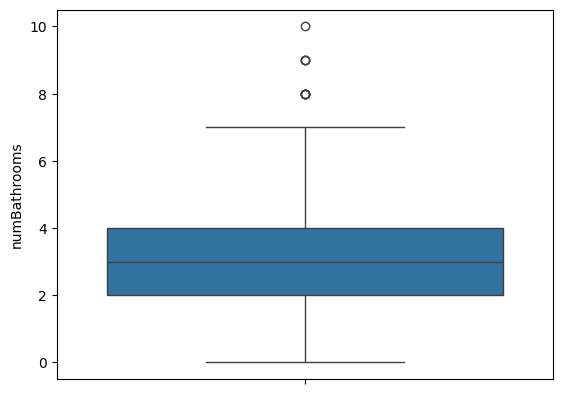

In [18]:
sns.boxplot(y="numBathrooms", data=dataset, orient="v", width=0.8 )

<Axes: xlabel='Status', ylabel='price'>

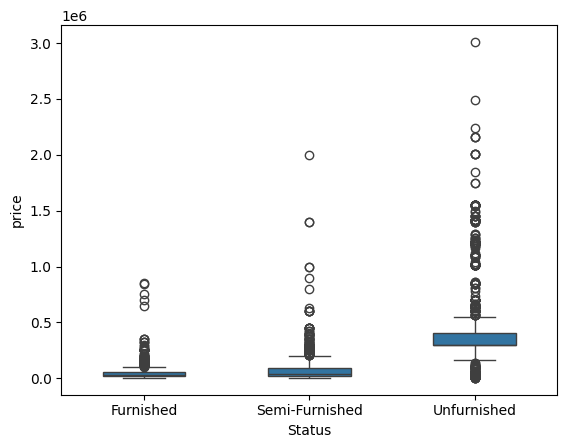

In [19]:
sns.boxplot(x="Status",y="price", data=dataset, orient="v", width=0.5 )

* violin plot

<Axes: ylabel='numBathrooms'>

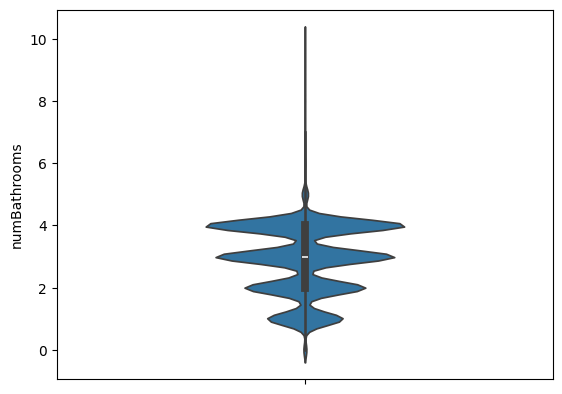

In [20]:
sns.violinplot(data=dataset, y="numBathrooms", width=0.4, orient="v")

<Axes: xlabel='Status', ylabel='price'>

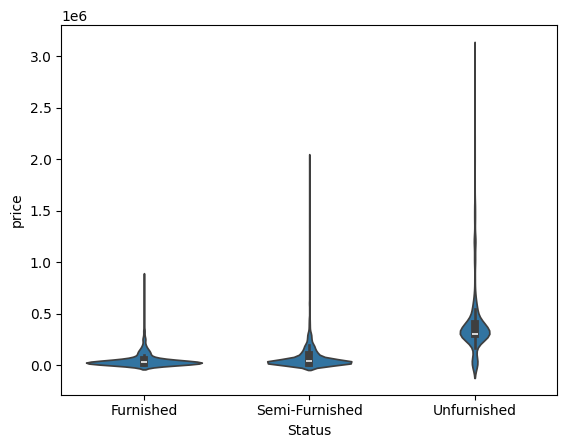

In [21]:
sns.violinplot(data=dataset, x="Status",y="price", width=0.7, orient="v")

* histogram

<Axes: xlabel='house_size', ylabel='Count'>

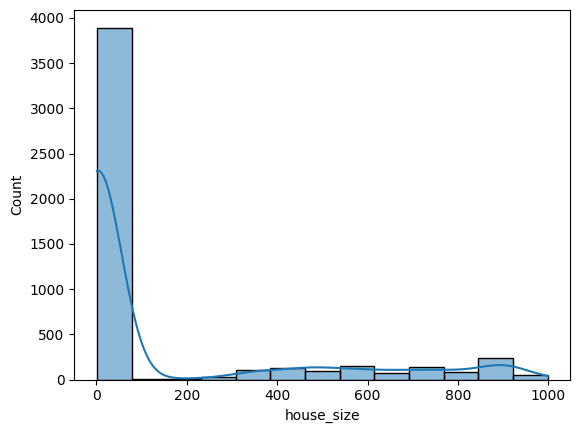

In [22]:
sns.histplot(data=dataset, x="house_size", binwidth=75, kde=True)

<Axes: xlabel='price', ylabel='Count'>

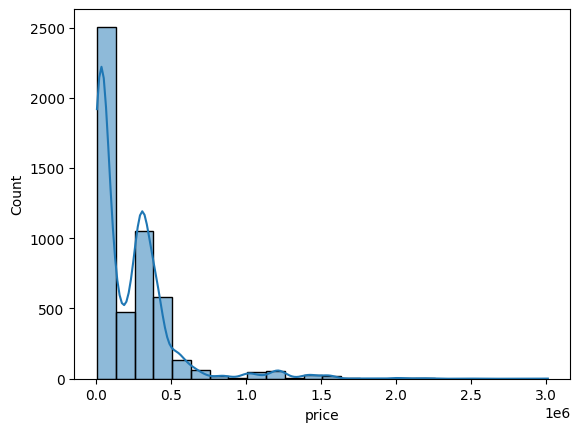

In [23]:
sns.histplot(data=dataset, x="price", bins=24, kde=True)

* Correlation

In [24]:
dataset[["price","house_size", "numBathrooms", "numBalconies", "latitude", "longitude"]].corr()

,price,house_size,numBathrooms,numBalconies,latitude,longitude
price,1.000000,-0.366699,0.598772,0.544860,-0.045589,0.133261
house_size,-0.366699,1.000000,-0.610538,-0.325528,0.055378,-0.148085
numBathrooms,0.598772,-0.610538,1.000000,0.502334,-0.072371,0.163404
numBalconies,0.544860,-0.325528,0.502334,1.000000,-0.058237,0.169790
latitude,-0.045589,0.055378,-0.072371,-0.058237,1.000000,0.498180
longitude,0.133261,-0.148085,0.163404,0.169790,0.498180,1.000000


<Axes: >

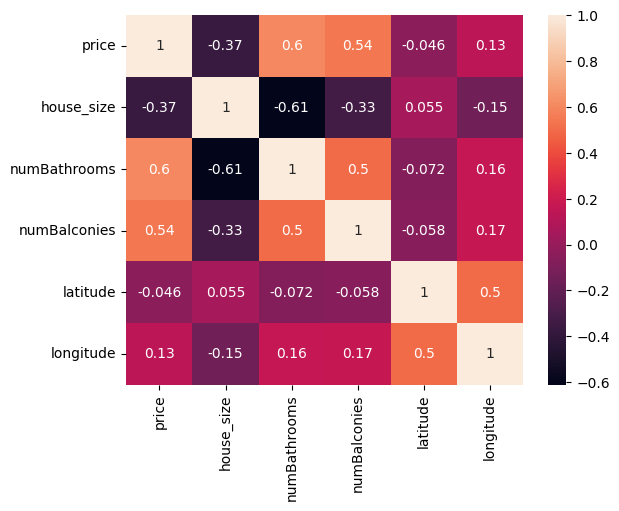

In [25]:
sns.heatmap(dataset[["price","house_size", "numBathrooms", "numBalconies", "latitude", "longitude"]].corr(), annot=True)

* Pair plot

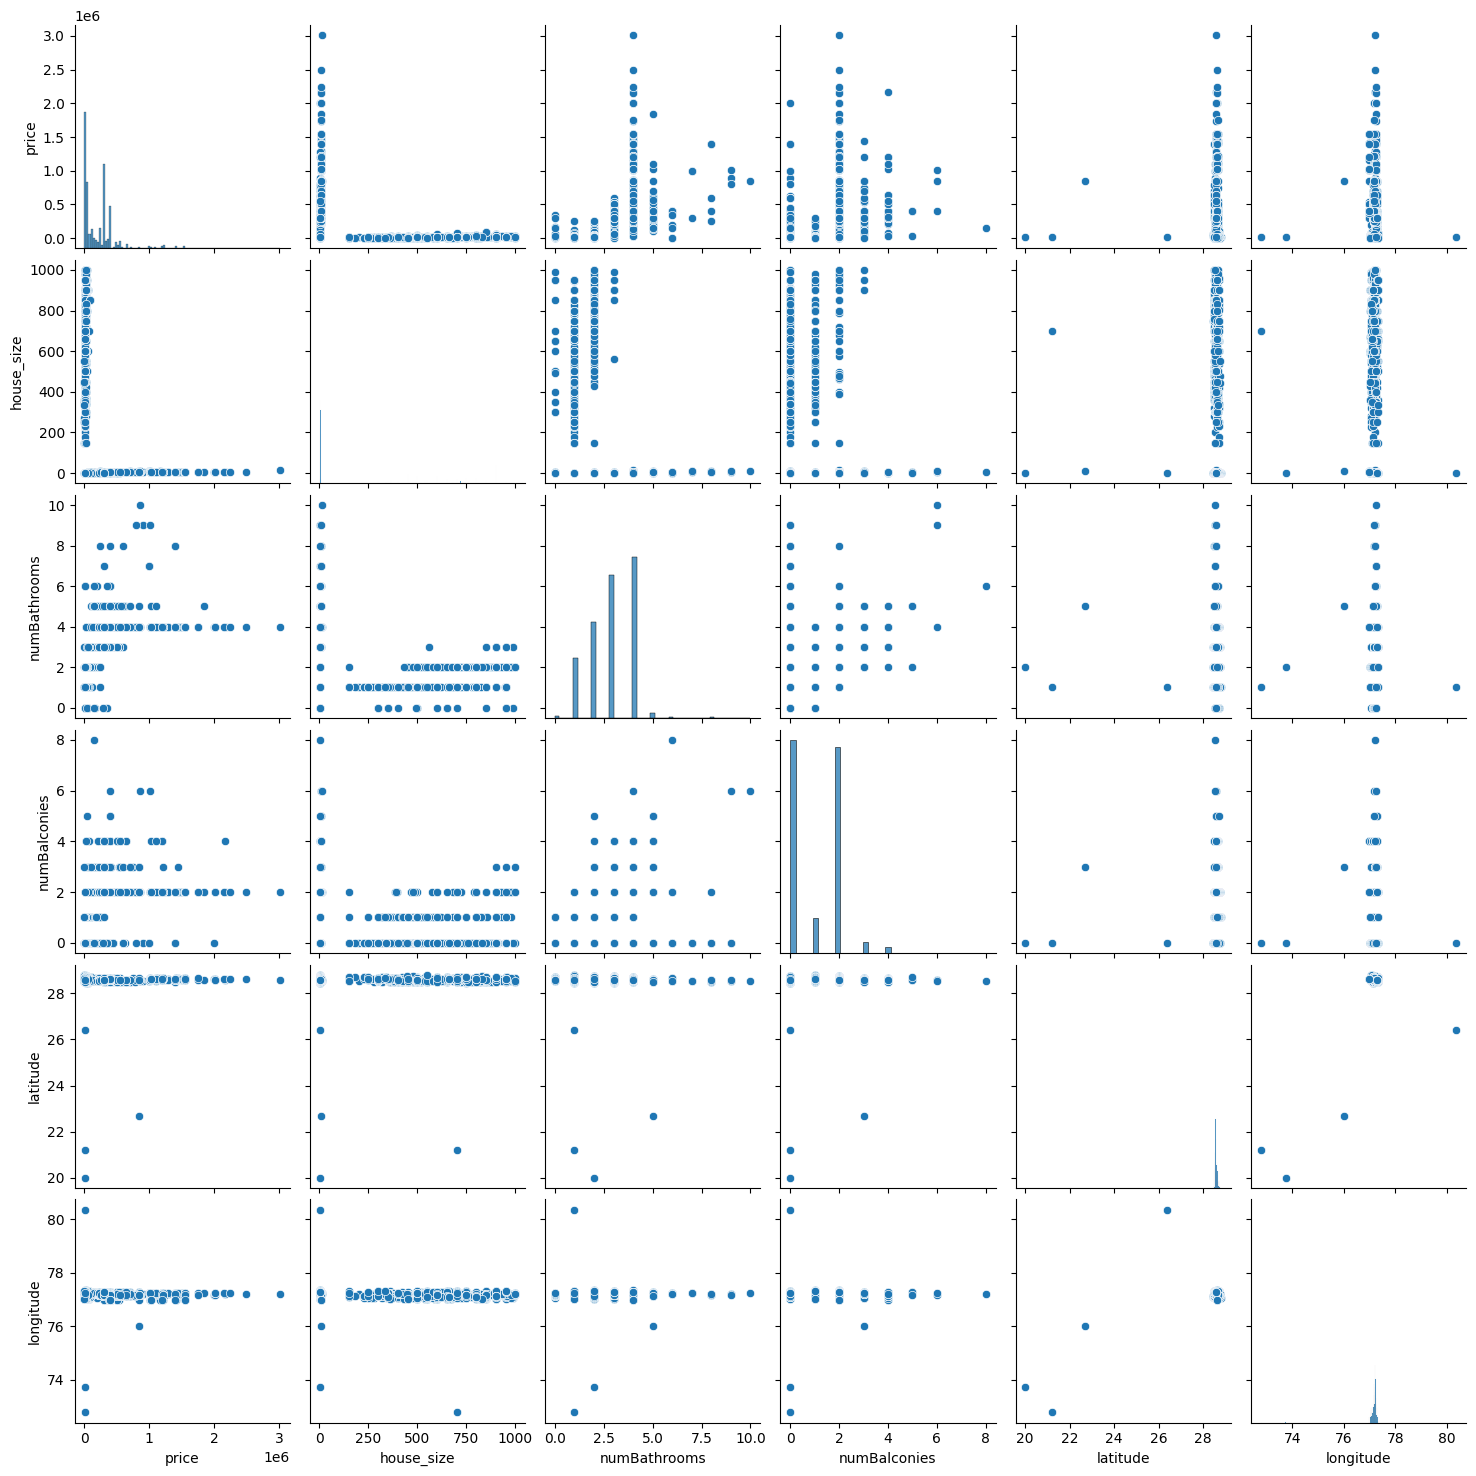

In [26]:
sns.pairplot(dataset[["price","house_size", "numBathrooms", "numBalconies", "latitude", "longitude"]])

* scatter plot

<Axes: xlabel='house_size', ylabel='price'>

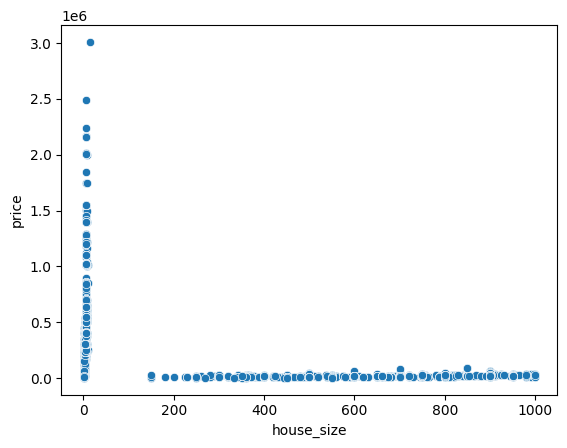

In [27]:
sns.scatterplot(x="house_size", y="price", data=dataset, )

* hexagonal plot

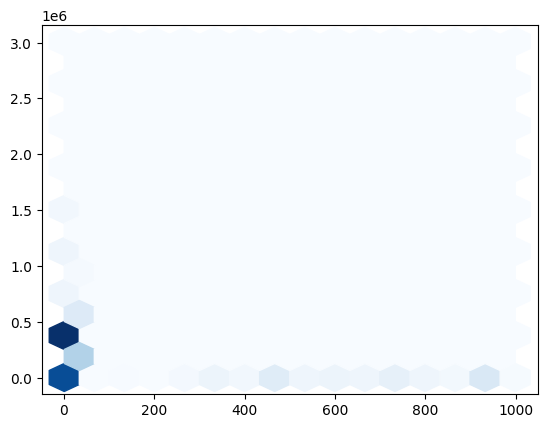

In [28]:
plt.hexbin(x="house_size", y="price", data=dataset, gridsize=15, cmap="Blues")

* pie chart

([<matplotlib.patches.Wedge at 0x179d9ef5370>,
 [Text(0.10902247273006728, 1.0945839851011077, 'Furnished'),
  Text(-0.5859039104536226, -0.9309761585106, 'Semi-Furnished'),
  Text(0.9844621018068119, -0.4907487851295351, 'Unfurnished')],
 [Text(0.05946680330730942, 0.5970458100551496, '46.8%'),
  Text(-0.31958395115652133, -0.5078051773694181, '38.4%'),
  Text(0.536979328258261, -0.26768115552520094, '14.7%')])

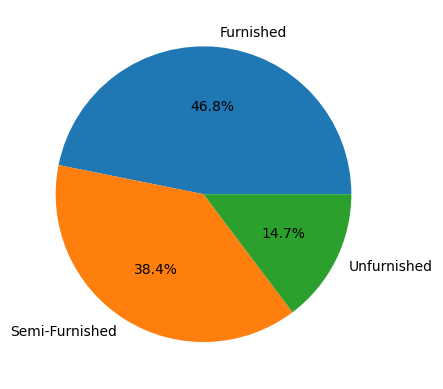

In [29]:
plt.pie(dataset["Status"].value_counts(), labels=dataset["Status"].unique(), autopct="%1.1f%%")

## 3. Data preprocessing Part II :

* Covert categorical data to numeric using one hot encoding method

In [30]:
ca_var =pd.get_dummies(dataset[["Status", "house_type"]])

In [31]:
dataset.drop(columns=["Status", "house_type"], inplace=True)

In [32]:
dataset = pd.concat([dataset, ca_var], axis=1)

In [33]:
dataset.tail()

,house_size,latitude,longitude,price,numBathrooms,numBalconies,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,house_type_1 BHK Apartment,...,house_type_5 BHK Independent House,house_type_5 BHK Villa,house_type_6 BHK Independent Floor,house_type_6 BHK penthouse,house_type_7 BHK Independent Floor,house_type_7 BHK Independent House,house_type_8 BHK Independent Floor,house_type_8 BHK Independent House,house_type_8 BHK Villa,house_type_9 BHK Independent House
4995,5.896,28.618437,76.961784,1022001,4.0,2.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4996,6.521,28.618437,76.961784,1549181,4.0,2.0,False,False,True,False,...,True,False,False,False,False,False,False,False,False,False
4997,1.855,28.567051,77.273560,301012,3.0,2.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4998,2.856,28.567051,77.273560,301011,3.0,2.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False
4999,2.856,28.567051,77.273560,301012,4.0,2.0,False,False,True,False,...,False,False,False,False,False,False,False,False,False,False


In [34]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 37 columns):
 #   Column                                Non-Null Count  Dtype  
---  ------                                --------------  -----  
 0   house_size                            5000 non-null   float64
 1   latitude                              5000 non-null   float64
 2   longitude                             5000 non-null   float64
 3   price                                 5000 non-null   int64  
 4   numBathrooms                          5000 non-null   float64
 5   numBalconies                          5000 non-null   float64
 6   Status_Furnished                      5000 non-null   bool   
 7   Status_Semi-Furnished                 5000 non-null   bool   
 8   Status_Unfurnished                    5000 non-null   bool   
 9   house_type_1 BHK Apartment            5000 non-null   bool   
 10  house_type_1 BHK Independent Floor    5000 non-null   bool   
 11  house_type_1 BHK 

* normalization

In [35]:
from sklearn import preprocessing
scale_d = preprocessing.normalize(dataset[["house_size", "latitude", "longitude", "price", "numBathrooms", "numBalconies"]])
dataset.drop(columns=["house_size", "latitude", "longitude", "price", "numBathrooms", "numBalconies"], inplace=True)
dataset_scaled = pd.concat([dataset, pd.DataFrame(scale_d, columns=["house_size", "latitude", "longitude", "price", "numBathrooms", "numBalconies"])], axis=1)
dataset_scaled.head()

,Status_Furnished,Status_Semi-Furnished,Status_Unfurnished,house_type_1 BHK Apartment,house_type_1 BHK Independent Floor,house_type_1 BHK Independent House,house_type_1 RK Studio Apartment,house_type_10 BHK Independent House,house_type_12 BHK Independent House,house_type_2 BHK Apartment,...,house_type_8 BHK Independent Floor,house_type_8 BHK Independent House,house_type_8 BHK Villa,house_type_9 BHK Independent House,house_size,latitude,longitude,price,numBathrooms,numBalconies
0,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,0.018179,0.001297,0.003511,0.999828,0.000045,0.0
1,True,False,False,False,False,False,True,False,False,False,...,False,False,False,False,0.019996,0.001432,0.003856,0.999792,0.000050,0.0
2,False,True,False,False,False,False,False,False,False,False,...,False,False,False,False,0.058719,0.003361,0.009049,0.998228,0.000117,0.0
3,True,False,False,False,False,False,False,False,False,False,...,False,False,False,False,0.000021,0.000598,0.001608,0.999999,0.000062,0.0
4,False,False,True,False,False,False,False,False,False,True,...,False,False,False,False,0.040466,0.001435,0.003853,0.999172,0.000100,0.0


## 4. Training Phase :

In [36]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error

In [37]:
X = dataset_scaled.drop(columns=["price"])
y = dataset_scaled["price"]
y = y.values.reshape(-1, 1)

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [38]:
model = LinearRegression( )
model.fit(X_train, y_train)

LinearRegression()

In [39]:
model.coef_

array([[-5.29210071e+07, -5.29210071e+07, -5.29210071e+07,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08,  5.18927655e+08,  5.18927655e+08,
         5.18927655e+08, -3.23880132e-02,  2.73137304e-01,
        -1.91359142e-01,  1.44841908e+00,  4.76601935e-01]])

In [40]:
model.intercept_

array([-4.66006647e+08])

In [41]:
r2_score(y_test, model.predict(X_test))

0.8823003400609267

In [42]:
model.score(X_test, y_test)

0.8823003400609267

In [43]:
mean_squared_error(y_test, model.predict(X_test))

2.9518140732928244e-08

In [44]:
mean_absolute_error(y_test, model.predict(X_test))

9.7943913384559e-05

In [45]:
X_test.iloc[0]

Status_Furnished                           False
Status_Semi-Furnished                      False
Status_Unfurnished                          True
house_type_1 BHK Apartment                  True
house_type_1 BHK Independent Floor         False
house_type_1 BHK Independent House         False
house_type_1 RK Studio Apartment           False
house_type_10 BHK Independent House        False
house_type_12 BHK Independent House        False
house_type_2 BHK Apartment                 False
house_type_2 BHK Independent Floor         False
house_type_2 BHK Independent House         False
house_type_3 BHK Apartment                 False
house_type_3 BHK Independent Floor         False
house_type_3 BHK Independent House         False
house_type_4 BHK Apartment                 False
house_type_4 BHK Independent Floor         False
house_type_4 BHK Independent House         False
house_type_4 BHK Villa                     False
house_type_5 BHK Apartment                 False
house_type_5 BHK Ind

In [46]:
y_test[0]

array([0.99927416])

In [47]:
model.predict(X_test.iloc[0].values.reshape(1, -1))

c:\Users\siham\AppData\Local\Programs\Python\Python312\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


array([[0.99879044]])